# Studying changes in global trade between 1993 and 2016
## 1. Setup
### Importing the trade data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_trade = pd.read_pickle('../data/df_trade.pkl')
df_trade.head()

,Reporter Countries,Partner Countries,Item,Element,Unit,Y1993,Y1994,Y1995,Y1996,Y1997,...,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016
11,Afghanistan,Argentina,Maize,Import Quantity,tonnes,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,Afghanistan,Argentina,Maize,Import Value,1000 US$,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,Afghanistan,Australia,"Anise, badian, fennel, coriander",Export Quantity,tonnes,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,Afghanistan,Australia,"Anise, badian, fennel, coriander",Export Value,1000 US$,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,Afghanistan,Australia,Apricots,Export Quantity,tonnes,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


### Plotting function

In [2]:
def plot_trade(s1, s2, label):
    plt.figure(figsize=(15,5))
    plt.xlabel('Year')

    ax1 = s1.plot(label=label+' Weights')
    ax2 = s2.plot(label=label+' Values', secondary_y=True)

    ax1.set_ylabel('tonnes')
    ax2.set_ylabel('1000 US$')

    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()

    plt.legend(h1+h2, l1+l2, loc=2)
    plt.show()

## 2. Global Trade Volume
We start by looking at the difference in trade volume by looking at the change in imports and exports by weight (in tonnes) and by value (in 1000 US$, adjusted to 2014-2016 value) 

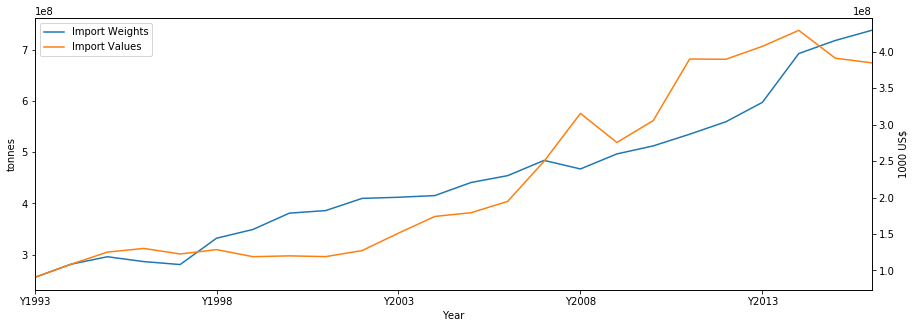

In [3]:
import_w = df_trade[(df_trade['Element'] == 'Import Quantity')]\
    [[f'Y{label}' for label in range(1993, 2017)]].sum(axis=0)
import_v = df_trade[(df_trade['Element'] == 'Import Value')]\
    [[f'Y{label}' for label in range(1993, 2017)]].sum(axis=0)

plot_trade(import_w, import_v, 'Import')

Cool. Now exports

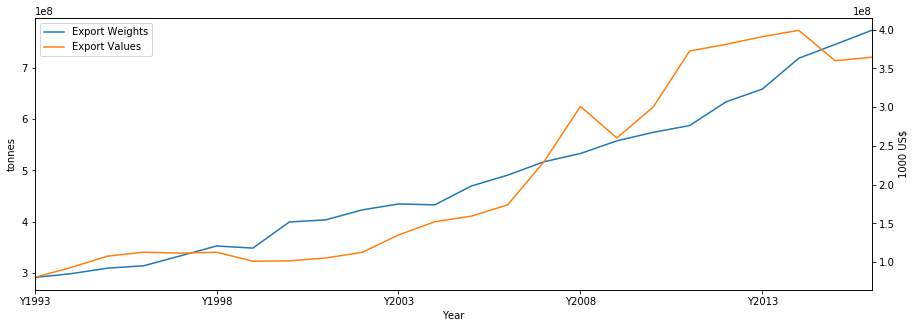

In [4]:
export_w = df_trade[(df_trade['Element'] == 'Export Quantity')]\
    [[f'Y{label}' for label in range(1993, 2017)]].sum(axis=0)
export_v = df_trade[(df_trade['Element'] == 'Export Value')]\
    [[f'Y{label}' for label in range(1993, 2017)]].sum(axis=0)

plot_trade(export_w, export_v, 'Export')

We can see some slight disparities between imports and exports. This arises from multiple issues. Let's see the difference.

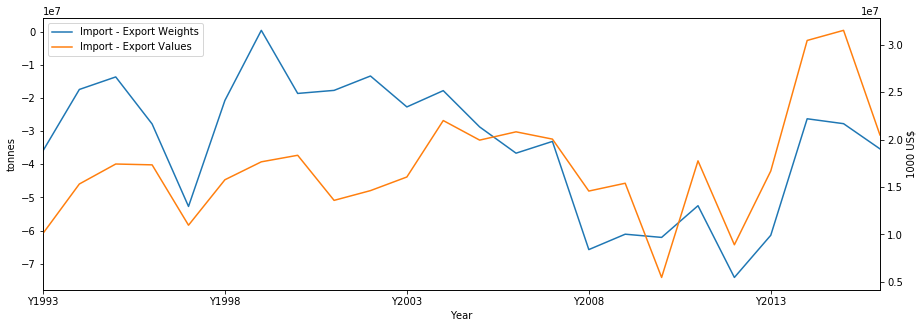

In [5]:
diff_w = import_w - export_w
diff_v = import_v - export_v

plot_trade(diff_w, diff_v, 'Import - Export')

We can see that every year, the amount of produce exported is greater than the amount of produce imported, but the value of imported produce is greater than the value of exported produce. Interesting.

## 3. Inter/Intra - Continental Trade Volume
Now we want to see how continents trade with each other. We define for this the following continents

* Africa
* Americas
* Asia
* Europe
* Oceania

I use the FAO's data to seperate the countries in the matrix into continents.

http://www.fao.org/faostat/en/#definitions

In [6]:
country_groups = pd.read_csv('../data/FAOSTAT_data_11-19-2019.csv')
country_groups.head()

,Country Group Code,Country Group,Country Code,Country,M49 Code,ISO2 Code,ISO3 Code
0,5100,Africa,4,Algeria,12.0,DZ,DZA
1,5100,Africa,7,Angola,24.0,AO,AGO
2,5100,Africa,53,Benin,204.0,BJ,BEN
3,5100,Africa,20,Botswana,72.0,BW,BWA
4,5100,Africa,24,British Indian Ocean Territory,86.0,IO,IOT


In [7]:
african_countries = set(country_groups[country_groups['Country Group'] == 'Africa']['Country'])
american_countries = set(country_groups[country_groups['Country Group'] == 'Americas']['Country'])
asian_countries = set(country_groups[country_groups['Country Group'] == 'Asia']['Country'])
european_countries = set(country_groups[country_groups['Country Group'] == 'Europe']['Country'])
oceanian_countries = set(country_groups[country_groups['Country Group'] == 'Oceania']['Country'])

continents = [african_countries, american_countries, asian_countries, european_countries, oceanian_countries]
continent_names = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']

We start by looking at how inter and intra continental has evolved between 1993 and 2016.

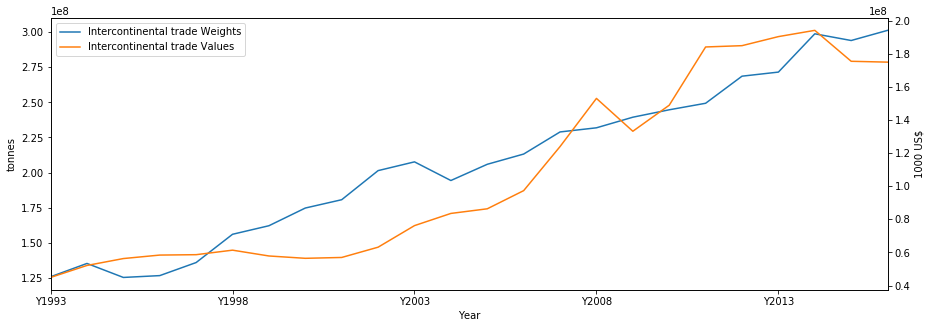

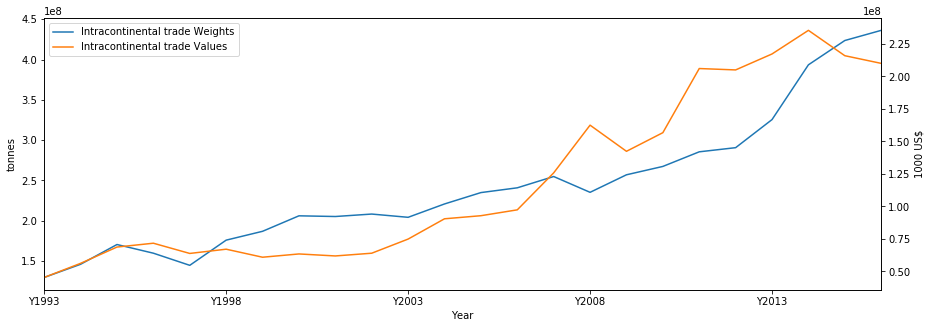

In [8]:
df_intracontinental_imports_w = pd.DataFrame(columns=df_trade.columns)
df_intracontinental_imports_v = pd.DataFrame(columns=df_trade.columns)

df_intercontinental_imports_w = pd.DataFrame(columns=df_trade.columns)
df_intercontinental_imports_v = pd.DataFrame(columns=df_trade.columns)


for c1 in continents:
    for c2 in continents:
        if c1 == c2:
            df_intracontinental_imports_w = df_intracontinental_imports_w\
                .append(df_trade[(df_trade['Reporter Countries'].isin(c1)) &
                                 (df_trade['Partner Countries'].isin(c1)) &
                                 (df_trade['Element'] == 'Import Quantity')])
            df_intracontinental_imports_v = df_intracontinental_imports_v\
                .append(df_trade[(df_trade['Reporter Countries'].isin(c1)) &
                                 (df_trade['Partner Countries'].isin(c1)) &
                                 (df_trade['Element'] == 'Import Value')])
        else:
            df_intercontinental_imports_w = df_intercontinental_imports_w\
                .append(df_trade[(df_trade['Reporter Countries'].isin(c1)) &
                                 (df_trade['Partner Countries'].isin(c2)) &
                                 (df_trade['Element'] == 'Import Quantity')])
            df_intercontinental_imports_v = df_intercontinental_imports_v\
                .append(df_trade[(df_trade['Reporter Countries'].isin(c1)) &
                                 (df_trade['Partner Countries'].isin(c2)) &
                                 (df_trade['Element'] == 'Import Value')])

df_intracontinental_imports_w = df_intracontinental_imports_w[[f'Y{label}' for label in range(1993, 2017)]]\
                                    .sum(axis=0)
df_intracontinental_imports_v = df_intracontinental_imports_v[[f'Y{label}' for label in range(1993, 2017)]]\
                                    .sum(axis=0)

df_intercontinental_imports_w = df_intercontinental_imports_w[[f'Y{label}' for label in range(1993, 2017)]]\
                                    .sum(axis=0)
df_intercontinental_imports_v = df_intercontinental_imports_v[[f'Y{label}' for label in range(1993, 2017)]]\
                                    .sum(axis=0)

plot_trade(df_intracontinental_imports_w, df_intracontinental_imports_v, 'Intercontinental trade')
plot_trade(df_intercontinental_imports_w, df_intercontinental_imports_v, 'Intracontinental trade')

At first glance, their increase looks more or less similar. But these plots are on different scales. We hence look at what proportion of imports were from other continents, compared to the same continent.

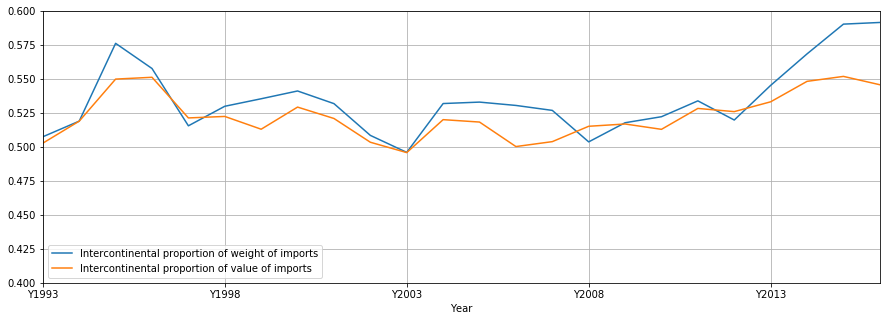

In [9]:
df_total_imports_w = df_intracontinental_imports_w + df_intercontinental_imports_w
df_total_imports_v = df_intracontinental_imports_v + df_intercontinental_imports_v

df_inter_perc_w = df_intercontinental_imports_w/df_total_imports_w
df_inter_perc_v = df_intercontinental_imports_v/df_total_imports_v

plt.figure(figsize=(15,5))
plt.xlabel('Year')
df_inter_perc_w.plot(label='Intercontinental proportion of weight of imports')
df_inter_perc_v.plot(label='Intercontinental proportion of value of imports')
plt.ylim([0.4, 0.6])
plt.grid()
plt.legend()
plt.show()

We notice that despite some fluctuations, and a more stable increase between 2003 and 2016, the proportion of intra and inter continental trade stays quite stable. We now want to look more precisely at regions. Instead of considering continents, we consider the regions:

* Africa
    * Eastern Africa
    * Middle Africa
    * Northern Africa
    * Southern Africa
    * Western Africa
* Americas
    * Northern America
    * Central America
    * Caribbean
    * South America
* Asia
    * Central Asia
    * Eastern Asia
    * Southern Asia
    * South-Eastern Asia
    * Western Asia
* Europe
    * Eastern Europe
    * Northern Europe
    * Southern Europe
    * Western Europe
* Oceania
    * Australia and New Zealand
    * Melanesia
    * Polynesia

In [10]:
region_names = ['Eastern Africa', 'Middle Africa', 'Northern Africa', 'Southern Africa', 'Western Africa',
                'Northern America', 'Central America', 'Caribbean', 'South America',
                'Central Asia', 'Eastern Asia', 'Southern Asia', 'South-Eastern Asia', 'Western Asia',
                'Eastern Europe', 'Northern Europe', 'Southern Europe', 'Western Europe',
                'Australia and New Zealand', 'Melanesia', 'Polynesia']
regions = [set(country_groups[country_groups['Country Group'] == region]['Country']) for region in region_names]

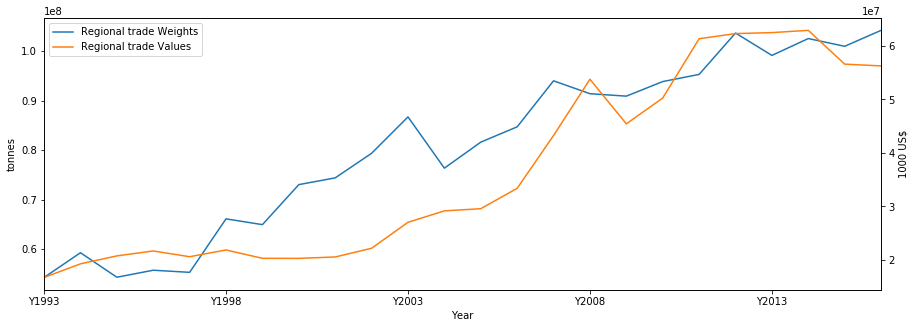

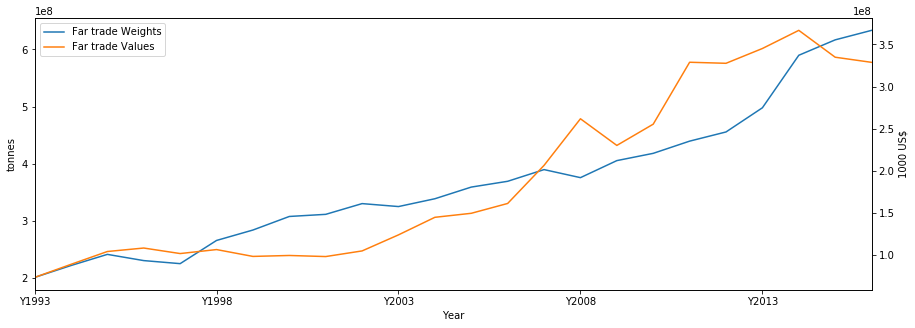

In [11]:
df_regional_imports_w = pd.DataFrame(columns=df_trade.columns)
df_regional_imports_v = pd.DataFrame(columns=df_trade.columns)

df_far_imports_w = pd.DataFrame(columns=df_trade.columns)
df_far_imports_v = pd.DataFrame(columns=df_trade.columns)


for c1 in regions:
    for c2 in regions:
        if c1 == c2:
            df_regional_imports_w = df_regional_imports_w\
                .append(df_trade[(df_trade['Reporter Countries'].isin(c1)) &
                                 (df_trade['Partner Countries'].isin(c1)) &
                                 (df_trade['Element'] == 'Import Quantity')])
            df_regional_imports_v = df_regional_imports_v\
                .append(df_trade[(df_trade['Reporter Countries'].isin(c1)) &
                                 (df_trade['Partner Countries'].isin(c1)) &
                                 (df_trade['Element'] == 'Import Value')])
        else:
            df_far_imports_w = df_far_imports_w\
                .append(df_trade[(df_trade['Reporter Countries'].isin(c1)) &
                                 (df_trade['Partner Countries'].isin(c2)) &
                                 (df_trade['Element'] == 'Import Quantity')])
            df_far_imports_v = df_far_imports_v\
                .append(df_trade[(df_trade['Reporter Countries'].isin(c1)) &
                                 (df_trade['Partner Countries'].isin(c2)) &
                                 (df_trade['Element'] == 'Import Value')])

df_regional_imports_w = df_regional_imports_w[[f'Y{label}' for label in range(1993, 2017)]]\
                                    .sum(axis=0)
df_regional_imports_v = df_regional_imports_v[[f'Y{label}' for label in range(1993, 2017)]]\
                                    .sum(axis=0)

df_far_imports_w = df_far_imports_w[[f'Y{label}' for label in range(1993, 2017)]]\
                                    .sum(axis=0)
df_far_imports_v = df_far_imports_v[[f'Y{label}' for label in range(1993, 2017)]]\
                                    .sum(axis=0)

plot_trade(df_regional_imports_w, df_regional_imports_v, 'Regional trade')
plot_trade(df_far_imports_w, df_far_imports_v, 'Far trade')

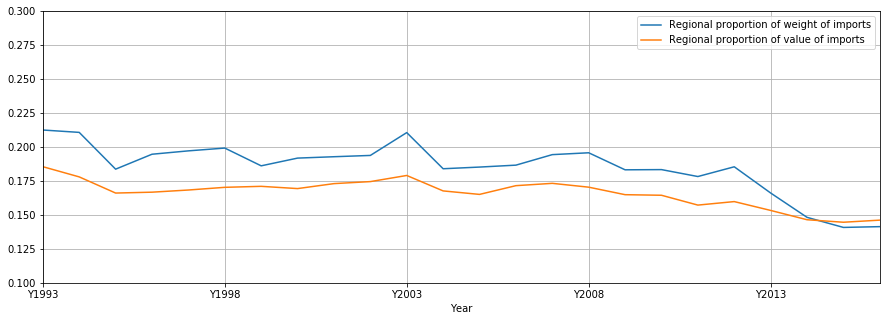

In [12]:
df_total_imports_w = df_regional_imports_w + df_far_imports_w
df_total_imports_v = df_regional_imports_v + df_far_imports_v

df_regional_perc_w = df_regional_imports_w/df_total_imports_w
df_regional_perc_v = df_regional_imports_v/df_total_imports_v

plt.figure(figsize=(15,5))
plt.xlabel('Year')
df_regional_perc_w.plot(label='Regional proportion of weight of imports')
df_regional_perc_v.plot(label='Regional proportion of value of imports')
plt.ylim([0.1, 0.3])
plt.grid()
plt.legend()
plt.show()

We can see that there seems to be a slow decrease in the proportion of trade that is done between countries in the same region, that started around 2008.

## 4 China and Imports

What are China's biggest trade partners, and how are they changing?

In [13]:
print(list(df_trade['Reporter Countries'].value_counts().index))

['Netherlands', 'France', 'Germany', 'United States of America', 'United Kingdom', 'Italy', 'Spain', 'Canada', 'Belgium', 'India', 'South Africa', 'Turkey', 'Austria', 'Switzerland', 'United Arab Emirates', 'Poland', 'China, mainland', 'Russian Federation', 'Denmark', 'Singapore', 'Sweden', 'Thailand', 'Egypt', 'Greece', 'Czechia', 'Belgium-Luxembourg', 'Ukraine', 'Australia', 'Hungary', 'Malaysia', 'Lebanon', 'Bulgaria', 'Indonesia', 'Romania', 'Saudi Arabia', 'Norway', 'Portugal', 'Slovenia', 'Croatia', 'Bahrain', 'Lithuania', 'New Zealand', 'Sri Lanka', 'Pakistan', 'Qatar', 'Kenya', 'Estonia', 'Brazil', 'Republic of Korea', 'Latvia', 'Kuwait', 'Slovakia', 'China, Hong Kong SAR', 'Argentina', 'Morocco', 'Finland', 'Mexico', 'Chile', 'Belarus', 'China, Taiwan Province of', "Côte d'Ivoire", 'Oman', 'United Republic of Tanzania', 'Ghana', 'Ireland', 'Serbia', 'Israel', 'Colombia', 'Japan', 'Kazakhstan', 'Republic of Moldova', 'Jordan', 'Iceland', 'Bosnia and Herzegovina', 'Peru', 'Cypru

In [15]:
china_names = ['China, mainland', 'China, Hong Kong SAR', 'China, Taiwan Province of', 'China, Macao SAR']

df_china_trade_w = df_trade[(df_trade['Reporter Countries'] == 'China, mainland') &
                            (df_trade['Element'] == 'Import Quantity')]
df_china_trade_v = df_trade[(df_trade['Reporter Countries'] == 'China, mainland') &
                            (df_trade['Element'] == 'Import Value')]

### 4.1 The Evolution of Chinese Imports

We start by looking at how Chinese imports changed over the past 20 years.

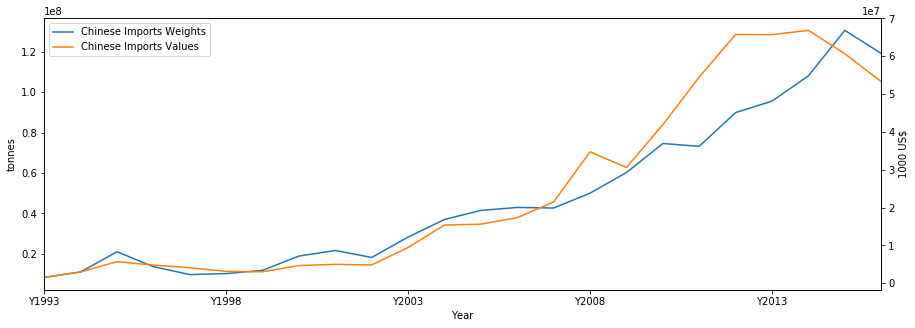

In [24]:
china_trades_w = df_china_trade_w[[f'Y{label}' for label in range(1993, 2017)]].sum(axis=0)
china_trades_v = df_china_trade_v[[f'Y{label}' for label in range(1993, 2017)]].sum(axis=0)

plot_trade(china_trades_w, china_trades_v, 'Chinese Imports')

Unsurprisingly, Chinese imports have greatly increased in the past 20 years

### 4.2 Trades with each continent

First, let's look at how much trade China does with countries on each continent

In [25]:
def sort_stuf(a):
    return a[1]['Y2016']


def group_trades(trade_df, sets_of_partners):
    """
    trade_df: the df to use
    sets_of_partners: list of sets of countries, with names
    """
    country_trades = []
    for name, countries in sets_of_partners:
        country_trades.append((
            name,
            trade_df[(trade_df['Partner Countries'].isin(countries))][
                    [f'Y{label}' for label in range(1993, 2017)]
                ].sum(axis=0)
        ))
    return country_trades
    

def plot_results(trade_sets, unit):
    plt.figure(figsize=(15,5))
    plt.xlabel('Year')
    plt.ylabel(f'Exports to China [{unit}]')
    for name, trades in trade_sets:
        trades_with_country = trades
        # Plot total trades
        trades_with_country.plot(label=f'Trade with {name}')

    plt.grid()
    plt.legend()
    plt.show()
    

def plot_partners(sets_of_partners, n):
    """
    sets_of_partners: list of sets of countries, with names
    n: the number of sets of countries to be plotted, the most important will be ploted
    """
    china_country_trades_w = group_trades(df_china_trade_w, sets_of_partners)
    china_country_trades_v = group_trades(df_china_trade_v, sets_of_partners)
    
    china_country_trades_w.sort(key=sort_stuf, reverse=True)
    china_country_trades_v.sort(key=sort_stuf, reverse=True)
    
    plot_results(china_country_trades_w[:n], 'tonnes')
    plot_results(china_country_trades_v[:n], 'US$, in Millions')
    
    trade_proportion_w = [(name, weights/china_trades_w) for (name, weights) in china_country_trades_w]
    trade_proportion_v = [(name, weights/china_trades_v) for (name, weights) in china_country_trades_v]

    trade_proportion_w.sort(key=sort_stuf, reverse=True)
    trade_proportion_v.sort(key=sort_stuf, reverse=True)
    
    plot_results(trade_proportion_w[:n], '% of total volume')
    plot_results(trade_proportion_v[:n], '% of total value')

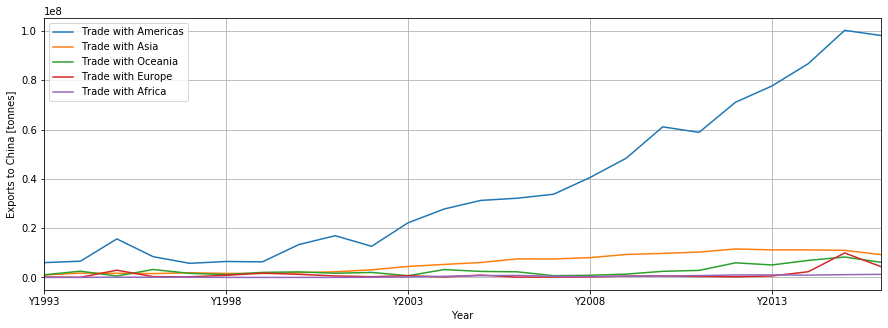

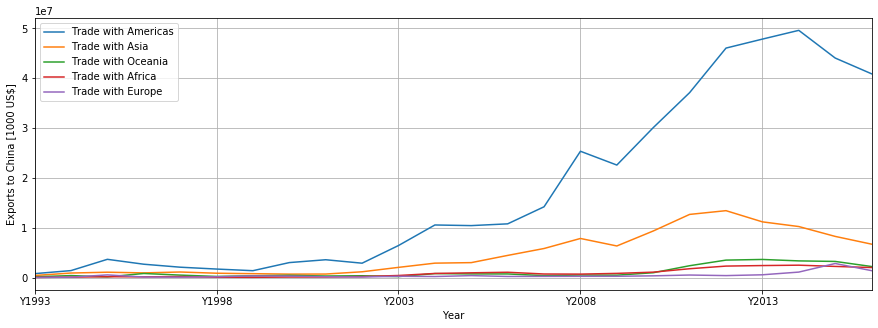

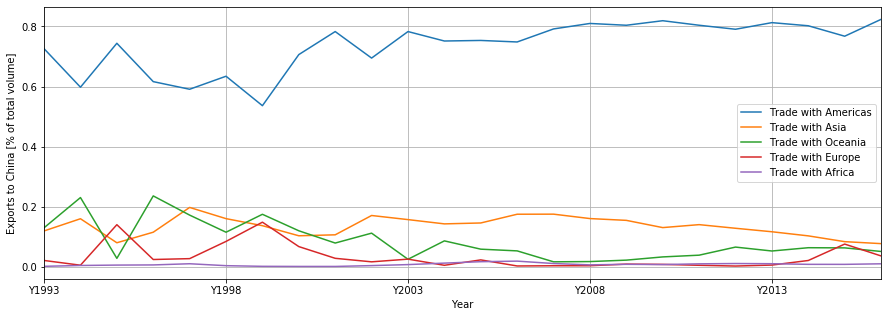

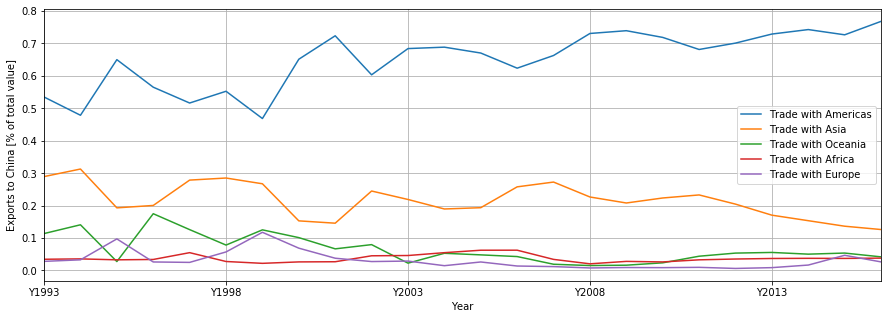

In [26]:
p = [(c_name, c) for (c_name, c) in zip(continent_names, continents)]
plot_partners(p, 5)

We can see that the American continent is China's main agricultural trade partner. In terms of proportion of total value, there has been an increase from between 50% and 60% in the 90s to around 70% in the 2010s.  Interestingly, trade with Asian countries has gone from around 30% of its total value in 1993 to around 13% in 2016.

We refine our search to which regions are most import to China.

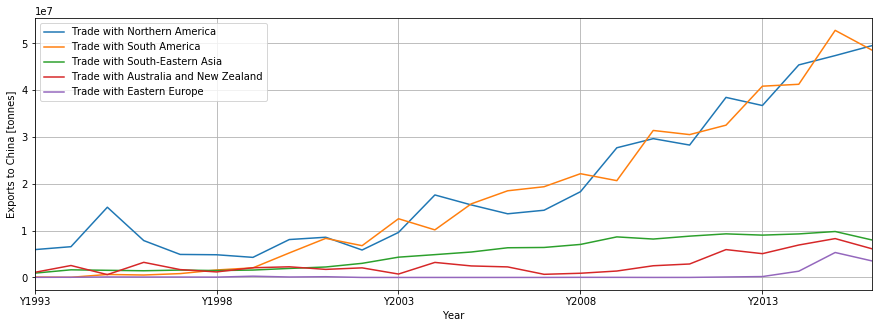

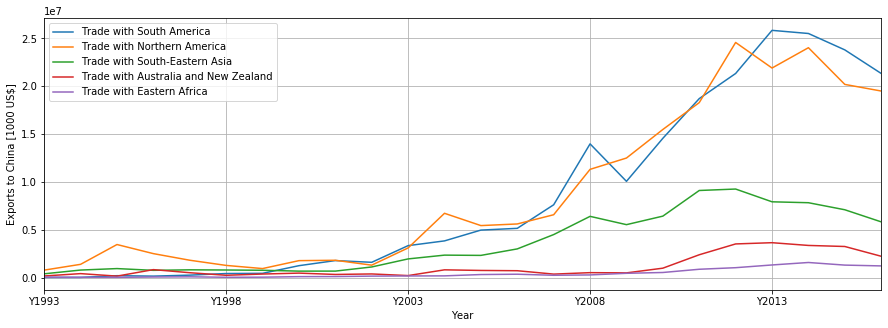

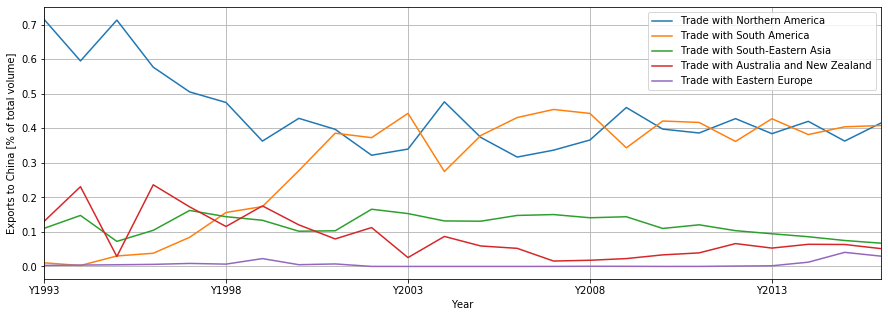

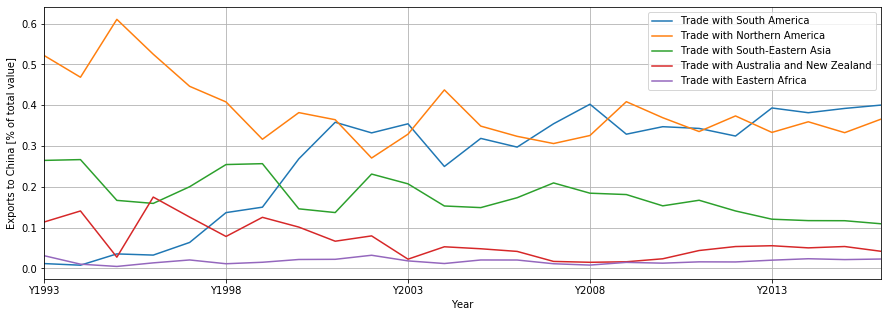

In [27]:
p = [(c_name, c) for (c_name, c) in zip(region_names, regions)]
plot_partners(p, 5)

South America has gone from a tiny playa in the 90s to one of the two main partners in 2016.

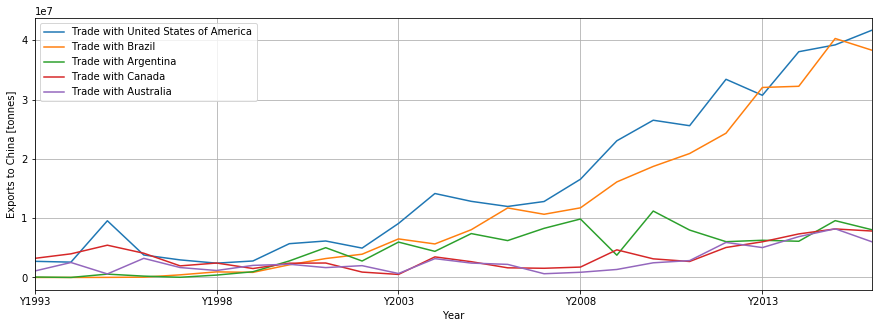

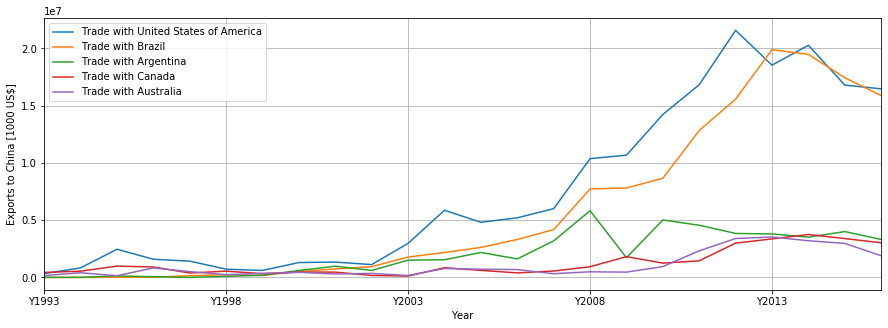

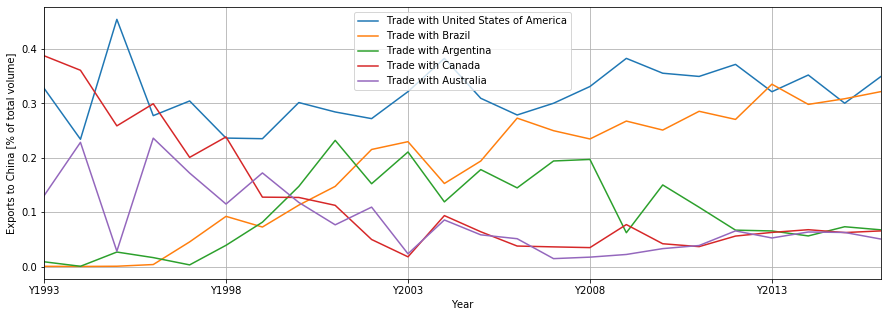

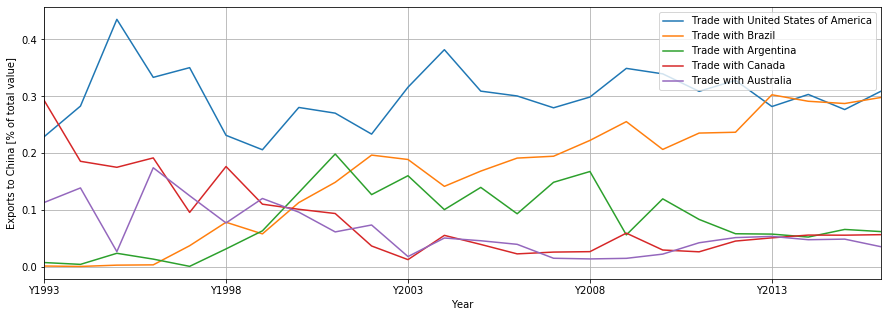

In [33]:
all_countries = african_countries.union(american_countries)\
                                    .union(asian_countries)\
                                    .union(european_countries)\
                                    .union(oceanian_countries)

p = [(c, {c}) for c in all_countries]
plot_partners(p, 5)